# **CLUSTERING**

Clustering is a type of unsupervised learning in machine learning where the goal is to group a set of objects into clusters based on their similarities. Each cluster contains objects that are more similar to each other than to those in other clusters.


**Difference between supervised and unsupervised learning :**   
  
  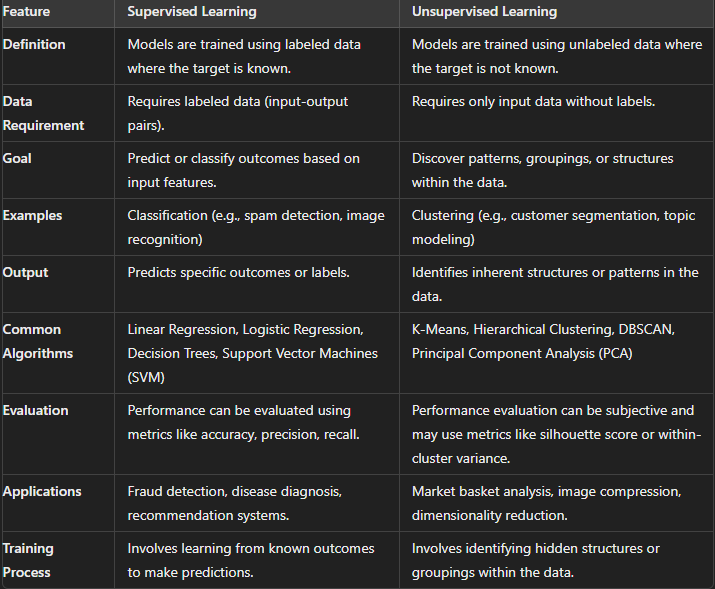

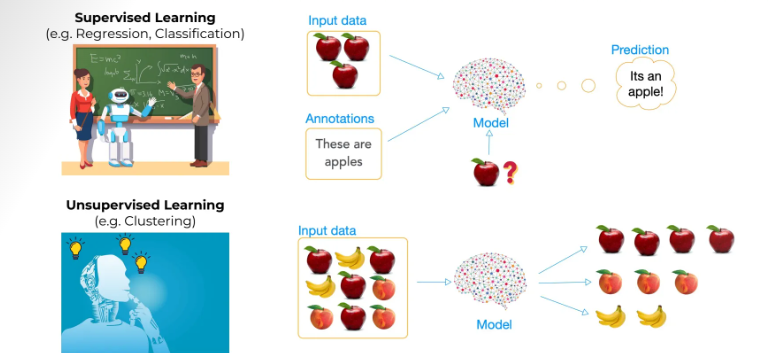

# K-Means Clustering


K-Means Clustering is a popular unsupervised machine learning algorithm used to partition data into distinct groups or clusters.

**How It Works**

---


1.   *Initialization:*

  Choose the number of clusters (k) you want to identify.
  
  Randomly initialize k cluster centroids (or select k data points as initial centroids).


2.   *Assignment:*

  Assign each data point to the nearest centroid based on a distance metric (usually Euclidean distance). Each point is assigned to the cluster with the closest centroid.


3.   *Update:*

  Recalculate the centroids by computing the mean of all data points assigned to each cluster. The centroid of each cluster is updated to this new mean.


4.   *Repeat:*

  Repeat the assignment and update steps until the centroids no longer change significantly or until a maximum number of iterations is reached.




# The Elbow Method

The Elbow Method is a technique used to determine the optimal number of clusters (k) in K-Means clustering. It helps identify the point at which increasing the number of clusters yields diminishing returns in terms of cluster quality.

**Steps in the Elbow Method**

---



1.   *Run K-Means Clustering :*   
Perform K-Means clustering on your dataset for a range of k values (e.g., k=1 to k=10).




2.   *Calculate the Within-Cluster Sum of Squares (WCSS) :*   
  For each k, compute the WCSS, which measures the total variance within each cluster. It’s the sum of squared distances between each data point and its cluster centroid.

3.   *Plot the WCSS Against k:*   
Create a plot of WCSS values on the y-axis against the number of clusters (k) on the x-axis.


4.   *Identify the Elbow Point:*   
Look for the "elbow" in the plot, where the rate of decrease in WCSS slows down. This point represents the optimal number of clusters.



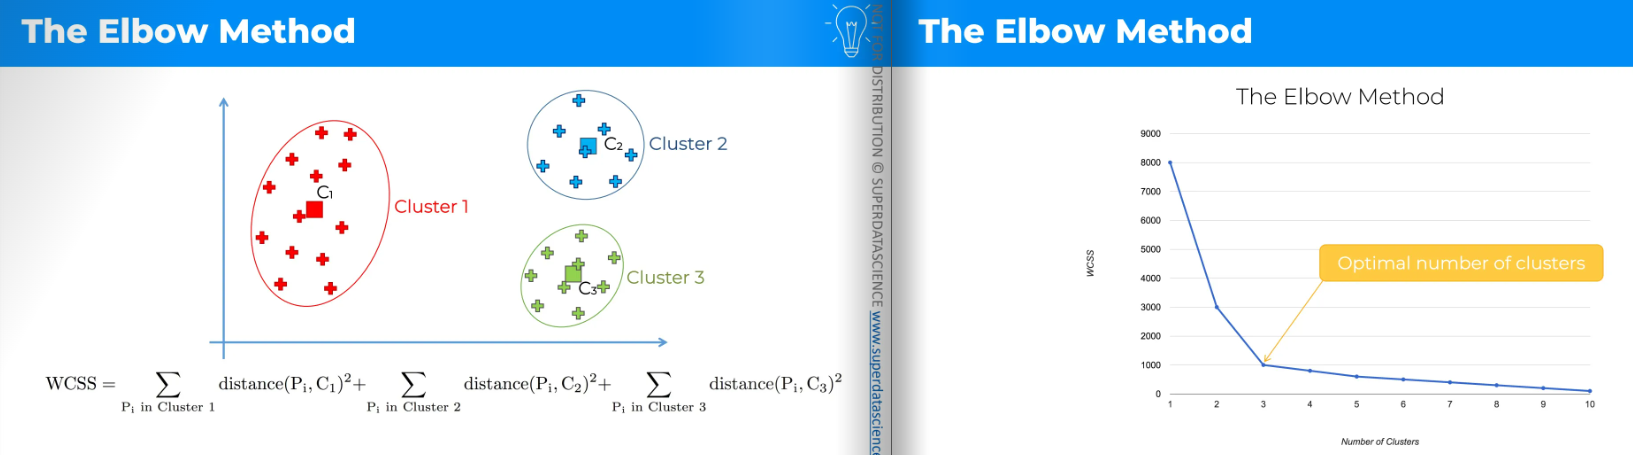

# K-means++ Clustering

K-Means++ is an enhancement of the K-Means clustering algorithm that improves the selection of initial centroids to achieve better clustering results.

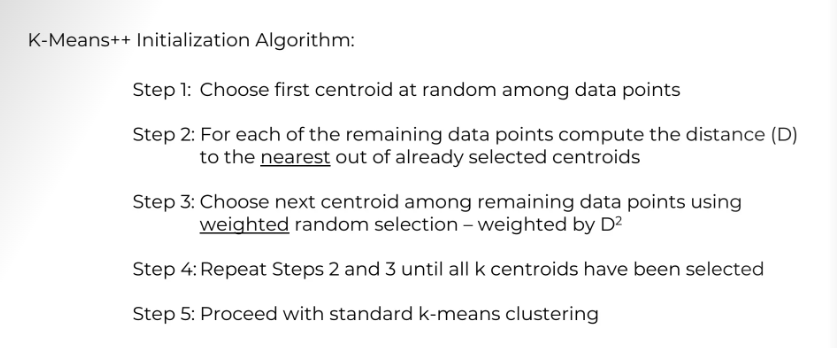



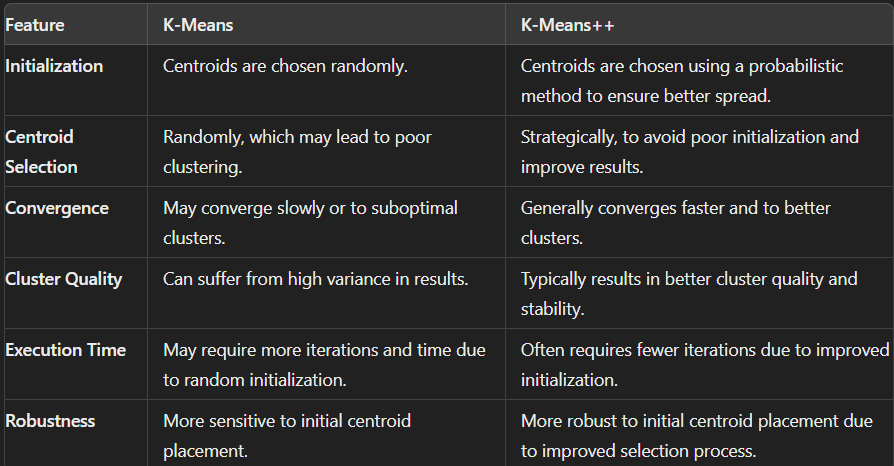

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,3:].values

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

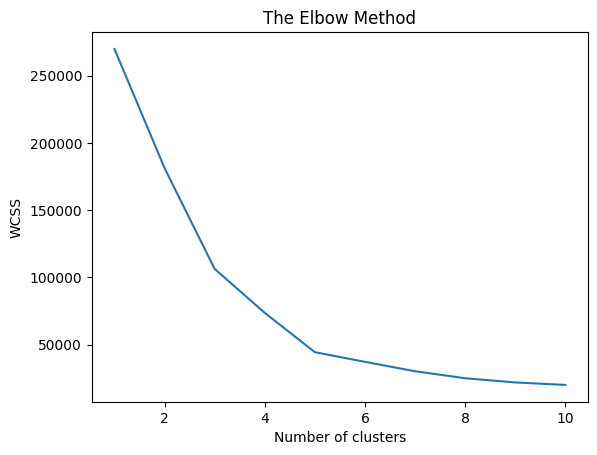

In [7]:
from re import I
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Visualising the clusters

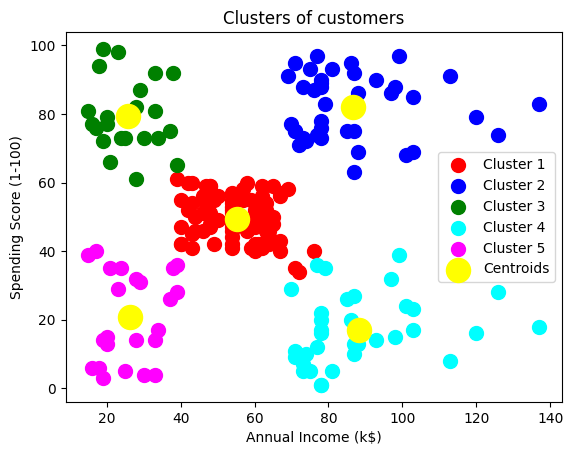

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()